<a href="https://colab.research.google.com/github/Ashahet1/Datascience/blob/main/BootCamp_Oreilly/lab01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# This code sets up display options, imports, etc.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib_inline.backend_inline import set_matplotlib_formats

import plotly.express as px
import plotly.io as pio

# set up plotting defaults
%matplotlib inline
set_matplotlib_formats("svg")
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (4, 3)
pio.templates.default = "simple_white"

# display options for numpy and pandas
np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.set_option("display.max_rows", 7)
pd.set_option("display.max_columns", 8)
pd.set_option("display.precision", 2)

# Lab 1: Pandas and Data Cleaning

**Data Science Bootcamp with Python, Pandas, and Plotly**

## Working with data tables in `pandas`

First, let's go over how to take notes.

In [3]:
# This is a code cell

### Subsetting and Filtering: NBA Salaries

In [4]:
import pandas as pd
import numpy as np

Let's load in salaries for NBA players in the '21-'22 season.

In [5]:
def data(csv):
    return f'https://github.com/DS-100/textbook/blob/master/content/datasets/{csv}?raw=true'

data('nba-2022.csv')

'https://github.com/DS-100/textbook/blob/master/content/datasets/nba-2022.csv?raw=true'

In [6]:
nba = pd.read_csv(data('nba-2022.csv'))
nba = nba.set_index('Player')
nba

,Position,Team,Salary
Player,,,
John Collins,PF,Atlanta Hawks,23000000
Danilo Gallinari,PF,Atlanta Hawks,20475000
Bogdan Bogdanović,SG,Atlanta Hawks,18000000
...,...,...,...
Raul Neto,PG,Washington Wizards,2089448
Daniel Gafford,C,Washington Wizards,1782621
Anthony Gill,PF,Washington Wizards,1517981


### What questions can we answer with this data?

Fill this cell in with your questions

### Subsetting

What is average Salary?

In [7]:
nba['Salary'].std()
# this is same as using the loc

nba.loc[:, 'Salary'].mean()

9010810.482939633

Who is paid the most ?

In [8]:
nba.sort_values('Salary', ascending=False).index[0]

'Stephen Curry'

In [9]:
nba['Salary'].idxmax()
nba['Salary'].max()

45780966

What did Draymond Green get paid?

In [10]:
nba.loc['Draymond Green', 'Salary']

24026712

In [11]:
nba.loc[:, ['Position', 'Salary']]
nba.iloc[0:5, :]

,Position,Team,Salary
Player,,,
John Collins,PF,Atlanta Hawks,23000000
Danilo Gallinari,PF,Atlanta Hawks,20475000
Bogdan Bogdanović,SG,Atlanta Hawks,18000000
Clint Capela,C,Atlanta Hawks,17103448
Delon Wright,SG,Atlanta Hawks,8526316


How many teams are there?

### Filtering

What is the avg Salary of Atlanta Hawks?

In [ ]:
len(nba['Team'].unique())

30

In [12]:
nba['Team' ] == 'Atlanta Hawks'

,Team
Player,
John Collins,True
Danilo Gallinari,True
Bogdan Bogdanović,True
...,...
Raul Neto,False
Daniel Gafford,False
Anthony Gill,False


In [13]:
nba[nba['Team' ] == 'Atlanta Hawks']['Salary'].mean()

10481282.0

In [15]:
nba[nba['Salary'] > 40_00_000_0]

,Position,Team,Salary
Player,,,
James Harden,PG,Brooklyn Nets,43848000
Kevin Durant,PF,Brooklyn Nets,40918900
Stephen Curry,PG,Golden State Warriors,45780966
Russell Westbrook,PG,Los Angeles Lakers,44211146
LeBron James,SF,Los Angeles Lakers,41180544


In [16]:
nba.query('Salary > 40_00_000_0')

,Position,Team,Salary
Player,,,
James Harden,PG,Brooklyn Nets,43848000
Kevin Durant,PF,Brooklyn Nets,40918900
Stephen Curry,PG,Golden State Warriors,45780966
Russell Westbrook,PG,Los Angeles Lakers,44211146
LeBron James,SF,Los Angeles Lakers,41180544


### Aggregating: Dog Breed Data

Fill this cell in with your questions.

In [17]:
dogs = pd.read_csv(data('dogs43.csv'))
dogs

,breed,kind,lifetime_cost,longevity,size,weight,height
0,Brittany,sporting,22589.0,12.92,medium,35.0,19.0
1,Cairn Terrier,terrier,21992.0,13.84,small,14.0,10.0
2,English Cocker Spaniel,sporting,18993.0,11.66,medium,30.0,16.0
...,...,...,...,...,...,...,...
40,Bullmastiff,working,13936.0,7.57,large,115.0,25.5
41,Mastiff,working,13581.0,6.50,large,175.0,30.0
42,Saint Bernard,working,20022.0,7.78,large,155.0,26.5


In [20]:
dogs.set_index('weight')
# that column just become the first one and then rest column is as is..

,breed,kind,lifetime_cost,longevity,size,height
weight,,,,,,
35.0,Brittany,sporting,22589.0,12.92,medium,19.0
14.0,Cairn Terrier,terrier,21992.0,13.84,small,10.0
30.0,English Cocker Spaniel,sporting,18993.0,11.66,medium,16.0
...,...,...,...,...,...,...
115.0,Bullmastiff,working,13936.0,7.57,large,25.5
175.0,Mastiff,working,13581.0,6.50,large,30.0
155.0,Saint Bernard,working,20022.0,7.78,large,26.5


In [22]:
dogs.assign(
    cost_per_year = dogs['lifetime_cost'] / dogs['longevity']
)


,breed,kind,lifetime_cost,longevity,size,weight,height,cost_per_year
0,Brittany,sporting,22589.0,12.92,medium,35.0,19.0,1748.37
1,Cairn Terrier,terrier,21992.0,13.84,small,14.0,10.0,1589.02
2,English Cocker Spaniel,sporting,18993.0,11.66,medium,30.0,16.0,1628.90
...,...,...,...,...,...,...,...,...
40,Bullmastiff,working,13936.0,7.57,large,115.0,25.5,1840.95
41,Mastiff,working,13581.0,6.50,large,175.0,30.0,2089.38
42,Saint Bernard,working,20022.0,7.78,large,155.0,26.5,2573.52


<Axes: xlabel='lifetime_cost', ylabel='longevity'>

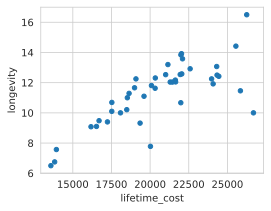

In [23]:
dogs.plot(kind='scatter', x='lifetime_cost', y='longevity')

**What kinds of dogs live longer than others?**

In [26]:
dogs.groupby('size')['longevity'].mean()
dogs.groupby('size')['longevity'].median()

,longevity
size,
large,9.48
medium,12.04
small,12.41


### Putting it all Together: Baby Names

#### Lilith, Lilibet … Lucifer? How Baby Names Went to ‘L’

https://archive.is/NpORG

### What are the claims made in the article?

Fill in this cell with your answers.

In [27]:
baby = pd.read_csv(data('babynames.csv'))
baby

,Name,Sex,Count,Year
0,Liam,M,19659,2020
1,Noah,M,18252,2020
2,Oliver,M,14147,2020
...,...,...,...,...
2020719,Verona,F,5,1880
2020720,Vertie,F,5,1880
2020721,Wilma,F,5,1880


<Axes: xlabel='Year'>

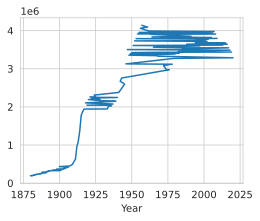

In [32]:
baby.groupby('Year')['Count'].sum().sort_values().loc[:].plot()

<Axes: xlabel='Year'>

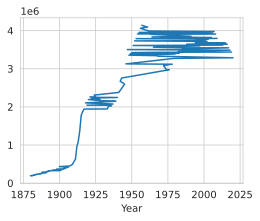

In [34]:
(baby
 .groupby('Year')['Count']
 .sum()
 .sort_values()
 .loc[:]
 .plot()
)

In [28]:
nyt = pd.read_csv(data('nyt_names.csv'))
nyt

,nyt_name,category
0,Lucifer,forbidden
1,Lilith,forbidden
2,Danger,forbidden
...,...,...
20,Venus,celestial
21,Celestia,celestial
22,Skye,celestial


### Recap: Data table manipulation

Fill in this cell with your notes.

## Data Cleaning

### CO2 Measurements on Mauna Loa

www.esrl.noaa.gov/gmd/ccgg/trends/

In [ ]:
!wget --output-document "co2_mm_mlo.txt" "https://github.com/DS-100/textbook/blob/master/content/datasets/co2_mm_mlo.txt?raw=true" 2> /dev/null

In [ ]:
!head co2_mm_mlo.txt

In [ ]:
from pathlib import Path

lines = Path('co2_mm_mlo.txt').read_text().split('\n')
len(lines)

In [ ]:
lines[:6]

In [ ]:
lines[69:79]

In [ ]:
...

### Missing Data

In [ ]:
...

In [ ]:
...

### You Try:

Get all the recordings with missing CO2 data (where the Avg column is less than 0)

In [ ]:
...

In [ ]:
# Don't worry about understanding this code for now, just look at the plots
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=3,
    subplot_titles=("Missing Dropped",
                    "Missing Set to NaN", "Missing Interpolated"))

co2_small = (co2[co2['Avg'] > 0])[:8]

fig.add_trace(
    go.Scatter(x=co2_small['Mo'], y=co2_small['Avg'],
               mode='lines+markers'),
    row=1, col=1)

co2_na = (co2.replace(-99.99, np.NaN))[:10]

fig.add_trace(
    go.Scatter(x=co2_na['Mo'], y=co2_na['Avg'], mode='lines+markers'),
    row=1, col=2)

fig.add_trace(
    go.Scatter(x=co2_na['Mo'], y=co2_na['Int'], mode='lines+markers'),
    row=1, col=3)

fig.update_xaxes(tickvals = np.arange(3, 13, 1), row=1, col=1)
fig.update_xaxes(tickvals = np.arange(3, 13, 1), row=1, col=2)
fig.update_xaxes(tickvals = np.arange(3, 13, 1), row=1, col=3)

fig.update_layout(height=350, margin=dict(t=30, b=0), showlegend=False)

fig.show()

### Granularity

In [ ]:
co2

#### You Try:

Find the average CO2 for each year, then plot the CO2 vs. year

In [ ]:
...

In [ ]:
fig = ...
fig.update_layout(showlegend=False)
fig

### Data Cleaning Principles

Fill in this cell with your notes.

## Case Study: Restaurant Safety Violations

https://data.sfgov.org/Health-and-Social-Services/Restaurant-Scores-LIVES-Standard/pyih-qa8i

In [ ]:
# businesses
bus = pd.read_csv(data('SF_Restaurant_Inspections/businesses.csv'), encoding='ISO-8859-1')

# inspections
insp = pd.read_csv(data('SF_Restaurant_Inspections/inspections.csv'))

# violations
viol = pd.read_csv(data('SF_Restaurant_Inspections/violations.csv'))

In [ ]:
bus

### Check Data Quality

#### You Try:

Write Python code to explore the `'postal_code'` column in `bus`. Find at least two issues.

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

### Look for Missing Data

#### You Try:

How many rows in `bus` have missing values for `'postal_code'`?

In [ ]:
...

### Transform Data

In [ ]:
insp

https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes

In [ ]:
dates = ...
dates

In [ ]:
def parse_dates_and_years(df):
    dates = pd.to_datetime(df['date'], format='%Y%m%d')
    years = dates.dt.year
    return df.assign(timestamp=dates, year=years)

def subset_2016(df):
    return df.query('year == 2016')

# inspections
ins2016 = (insp
           .pipe(parse_dates_and_years)
           .pipe(subset_2016))

# violations
vio2016 = (viol
           .pipe(parse_dates_and_years)
           .pipe(subset_2016))

#### You Try:

Use `vio2016` to create a dataframe called `num_vios` that has one row per inspection. It should have three columns:

- `business_id`: The business ID.
- `timestamp`: The date of the inspection.
- `num_vio`: The total number of violations the inspection recorded on that date.

The resulting dataframe should have 4806 rows.

In [ ]:
...

In [ ]:
ins_and_num_vios = ins2016.merge(num_vios, on=['business_id', 'timestamp'], how='left')
ins_and_num_vios

In [ ]:
ins_and_num_vios['num_vio'].isnull().sum()

In [ ]:
px.box(ins_and_num_vios, x="num_vio", y="score")

### Do certain kinds of violations impact safety score more than others?

In [ ]:
vio2016['description'].value_counts().head(15).to_frame()

In [ ]:
from IPython.display import display
with pd.option_context("display.max_rows", 15):
    display(vio2016['description'].value_counts().head(15).to_frame())

In [ ]:
def make_vio_categories(vio):
    def has(term):
        return vio['description'].str.contains(term)

    return vio[['business_id', 'timestamp']].assign(
        high_risk        = has(r"high risk"),
        clean            = has(r"clean|sanit"),
        food_surface     = (has(r"surface") & has(r"\Wfood")),
        vermin           = has(r"vermin"),
        storage          = has(r"thaw|cool|therm|storage"),
        permit           = has(r"certif|permit"),
        non_food_surface = has(r"wall|ceiling|floor|surface"),
        human            = has(r"hand|glove|hair|nail"),
    )

In [ ]:
# The violations with the new categories.
# `vio_ctg` is short for `violation categories`.
vio_ctg = vio2016.pipe(make_vio_categories)
vio_ctg

In [ ]:
# Need to change granularity
vio_counts = vio_ctg.groupby(['business_id', 'timestamp']).sum().reset_index()
vio_counts

In [ ]:
feature_names = ['high_risk', 'clean', 'food_surface', 'vermin',
                 'storage', 'permit', 'non_food_surface', 'human']

def left_join_features(ins):
    return (ins[['business_id', 'timestamp', 'score']]
            .merge(vio_counts, on=['business_id', 'timestamp'], how='left'))

def zero_features_for_perfect_scores(ins):
    ins = ins.copy()
    ins.loc[ins['score'] == 100, feature_names] = 0
    return ins

In [ ]:
ins_and_vios = (ins2016.pipe(left_join_features)
                .pipe(zero_features_for_perfect_scores))
ins_and_vios.head(3)

In [ ]:
...

In [ ]:
...